<a href="https://colab.research.google.com/github/masaya-ueda/Masayagithub/blob/master/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gunzip "/content/drive/My Drive/Colab Notebooks/datasets/train.tar.gz"
!gunzip "/content/drive/My Drive/Colab Notebooks/datasets/test.tar.gz"
!gunzip "/content/drive/My Drive/Colab Notebooks/datasets/val.tar.gz"

gzip: /content/drive/My Drive/Colab Notebooks/datasets/train.tar.gz: No such file or directory
gzip: /content/drive/My Drive/Colab Notebooks/datasets/test.tar.gz: No such file or directory


KeyboardInterrupt: ignored

In [2]:
!tar xvf "/content/drive/My Drive/Colab Notebooks/datasets/train.tar"
!tar xvf "/content/drive/My Drive/Colab Notebooks/datasets/test.tar"
!tar xvf "/content/drive/My Drive/Colab Notebooks/datasets/val.tar"

ストリーミング出力は最後の 5000 行に切り捨てられました。
train/1/6951.png
train/1/6952.png
train/1/6953.png
train/1/6954.png
train/1/6955.png
train/1/6956.png
train/1/6957.png
train/1/6958.png
train/1/6959.png
train/1/6960.png
train/1/6961.png
train/1/6962.png
train/1/6963.png
train/1/6964.png
train/1/6965.png
train/1/6966.png
train/1/6967.png
train/1/6968.png
train/1/6969.png
train/1/6970.png
train/1/7012.png
train/1/7013.png
train/1/7014.png
train/1/7015.png
train/1/7016.png
train/1/7017.png
train/1/7018.png
train/1/7019.png
train/1/7020.png
train/1/7021.png
train/1/7022.png
train/1/7023.png
train/1/7024.png
train/1/7025.png
train/1/7026.png
train/1/7027.png
train/1/7028.png
train/1/7029.png
train/1/7030.png
train/1/7031.png
train/1/7032.png
train/1/7033.png
train/1/7034.png
train/1/7035.png
train/1/7036.png
train/1/7037.png
train/1/7038.png
train/1/7039.png
train/1/7040.png
train/1/7041.png
train/1/7042.png
train/1/7116.png
train/1/7117.png
train/1/7118.png
train/1/7119.png
train/1/7120.png
train/1/7121.png

In [3]:
import os
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.optimizers import Adam, Adagrad, RMSprop, SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

Using TensorFlow backend.


In [4]:
import cv2
import numpy as np
import glob

#学習用のラベル0の画像とラベルをそれぞれ配列に格納
imgs1 = []  #画像を入れる配列の初期化
labels1 = []  #ラベルを入れる配列の初期化
files = glob.glob("/content/train/0/*.png")  #train/0/*.pngのファイル名取得
for f in files:  #すべてのファイルに対するfor文
    img = cv2.imread(f)  #画像の読み込み
    imgs1.append(img)  #画像を配列imgs1に追加
i = 1 #iに1を代入
while i < 4487:  #画像枚数文while文で繰り返す
    labels1.append(0)  #ラベル0を配列labels1に追加
    i += 1  #iに1を足す

#学習用のラベル1の画像とラベルをそれぞれの配列に格納
files = glob.glob("/content/train/1/*.png")
for f in files:
    img = cv2.imread(f)
    imgs1.append(img)
i=1
while i < 4495:
    labels1.append(1)
    i += 1
x_train = np.array(imgs1)   
labels = np.array(labels1)
y_train = labels[:, np.newaxis]

#テスト用のラベル0の画像とラベルをそれぞれ配列に格納
imgs2 = []  #画像を入れる配列の初期化
labels2 = []  #ラベルを入れる配列の初期化
files = glob.glob("/content/test/0/*.png")  #train/0/*.pngのファイル名取得
for f in files:  #すべてのファイルに対するfor文
    img = cv2.imread(f)  #画像の読み込み
    imgs2.append(img)  #画像を配列imgs2に追加
i = 1 #iに1を代入
while i < 1196:  #画像枚数文while文で繰り返す
    labels2.append(0)  #ラベル0を配列labels1に追加
    i += 1  #iに1を足す

#テスト用のラベル1の画像とラベルをそれぞれの配列に格納
files = glob.glob("/content/test/1/*.png")
for f in files:
    img = cv2.imread(f)
    imgs2.append(img)
i=1
while i < 1264:
    labels2.append(1)
    i += 1
x_test = np.array(imgs2)   
labels2 = np.array(labels2)
y_test = labels2[:, np.newaxis]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(8980, 224, 224, 3) (8980, 1) (2458, 224, 224, 3) (2458, 1)


In [0]:
# データ型の変換＆正規化
x_train = x_train.astype('float32') / 255  #スケールを揃える
x_test = x_test.astype('float32') / 255
# one-hot変換
num_classes = 2  #クラスの数
y_train = to_categorical(y_train, num_classes = num_classes)  #入力する為の形状に揃える
y_test = to_categorical(y_test, num_classes = num_classes)

In [0]:
model = Sequential()  #モデルの定義

#畳み込み層
model.add(Conv2D(
    64, # フィルター数（出力される特徴マップのチャネル）
    kernel_size = (4, 4), # フィルターサイズ
    padding = "valid", # 入出力サイズが異なる
    activation = "relu", # 活性化関数
    input_shape = (224, 224, 3) # 入力サイズ
))

#畳み込み層
model.add(Conv2D(
    64,
    kernel_size = (4, 4),
    activation = "relu"
))

#プーリング層 
model.add(MaxPooling2D(pool_size = (4, 4)))  #4×4のフィルタから最大値をとる
model.add(Dropout(0.2))  #過学習を抑える

#畳み込み層
model.add(Conv2D(
    64,
    kernel_size = (4, 4),
    padding = "valid", 
    activation = "relu"
))

#畳み込み層
model.add(Conv2D(
    64,
    kernel_size = 3,
    activation = "relu"
))

#プーリング層
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# 全結合層（fully-connected layers）につなげるため、
# マトリックスデータ（多次元配列）である特徴マップを多次元ベクトルに変換（平坦化）
model.add(Flatten())
model.add(Dense(512, activation = "relu"))# サイズ512のベクトル（512次元ベクトル）を出力
model.add(Dropout(0.5))
model.add(Dense(num_classes))# クラス数のベクトルを出力
model.add(Activation("softmax"))  #総和1となる確率を算出する関数

optimizer = Adam(lr = 0.001)
model.compile(
    optimizer = optimizer,
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 221, 221, 64)      3136      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 64)      65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 51, 51, 64)        65600     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 49, 49, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)       

In [0]:
# EarlyStopping, 監視する値が変化したときに訓練を停止
early_stopping = EarlyStopping( 
    monitor='val_loss',  #監視する値
    patience=10,  #10epochで値が改善されなければ訓練停止
    verbose=1  #ログをプログレスバーで出力
)

# ModelCheckpoint, 各epoch終了時にmodelを保存
#weights_dir = './weights/'
#if os.path.exists(weights_dir) == False:os.mkdir(weights_dir)
#model_checkpoint = ModelCheckpoint(
#    weights_dir + "val_loss{val_loss:.3f}.hdf5",
#    monitor = 'val_loss',  #監視する値
#    verbose = 1,
#    save_best_only = False,
#    save_weights_only = False,
#    period = 3  #チェックポイント間の間隔（エポック数）．
#)

# reduce learning rate, 評価値の改善が止まった時に学習率を減らす
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',  #監視する値
    factor = 0.1,  #学習率を減らす割合
    patience = 3,  #3epoch
    verbose = 1  #学習率削減時メッセージを出力
)

# log for TensorBoard
logging = TensorBoard(log_dir = "log/")

In [10]:
%%time

# モデルの学習
hist = model.fit(
    x_train,
    y_train,


    verbose = 1,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.2,
    callbacks = [early_stopping, reduce_lr, logging]
)

Train on 7184 samples, validate on 1796 samples
Epoch 1/10
7184/7184 [==============================] - 31s 4ms/step - loss: 0.4265 - accuracy: 0.8103 - val_loss: 0.4194 - val_accuracy: 0.8335
Epoch 2/10
7184/7184 [==============================] - 24s 3ms/step - loss: 0.2654 - accuracy: 0.8952 - val_loss: 0.4725 - val_accuracy: 0.8157
Epoch 3/10
7184/7184 [==============================] - 24s 3ms/step - loss: 0.1754 - accuracy: 0.9410 - val_loss: 0.1462 - val_accuracy: 0.9543
Epoch 4/10
7184/7184 [==============================] - 24s 3ms/step - loss: 0.1328 - accuracy: 0.9567 - val_loss: 0.1085 - val_accuracy: 0.9716
Epoch 5/10
7184/7184 [==============================] - 24s 3ms/step - loss: 0.1080 - accuracy: 0.9667 - val_loss: 0.1148 - val_accuracy: 0.9671
Epoch 6/10
7184/7184 [==============================] - 24s 3ms/step - loss: 0.0927 - accuracy: 0.9695 - val_loss: 0.1225 - val_accuracy: 0.9655
Epoch 7/10
7184/7184 [==============================] - 24s 3ms/step - loss: 0.085

In [0]:
model_dir = './model/'
if os.path.exists(model_dir) == False:os.mkdir(model_dir)

model.save(model_dir + 'model.hdf5')

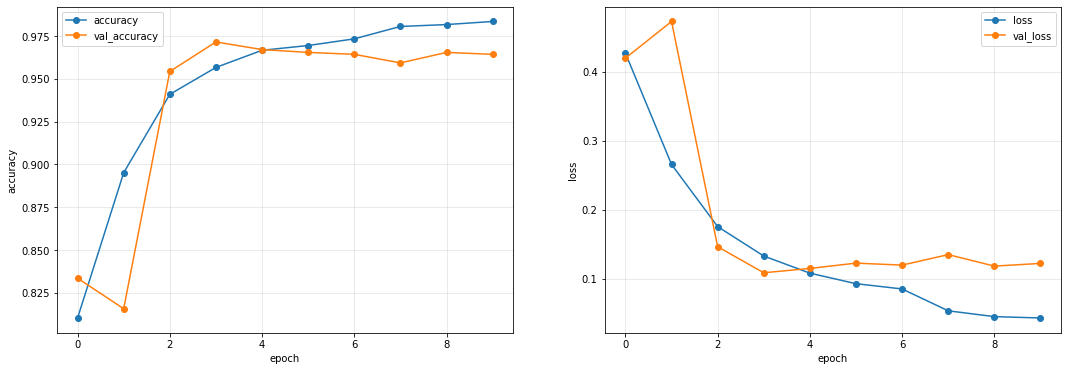

In [12]:
plt.figure(figsize = (18,6))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history["accuracy"], label = "accuracy", marker = "o")
plt.plot(hist.history["val_accuracy"], label = "val_accuracy", marker = "o")
#plt.xticks(np.arange())
#plt.yticks(np.arange())
plt.xlabel("epoch")
plt.ylabel("accuracy")
#plt.title("")
plt.legend(loc = "best")
plt.grid(color = 'gray', alpha = 0.2)

# loss
plt.subplot(1, 2, 2)
plt.plot(hist.history["loss"], label = "loss", marker = "o")
plt.plot(hist.history["val_loss"], label = "val_loss", marker = "o")
#plt.xticks(np.arange())
#plt.yticks(np.arange())
plt.xlabel("epoch")
plt.ylabel("loss")
#plt.title("")
plt.legend(loc = "best")
plt.grid(color = 'gray', alpha = 0.2)

plt.show()


In [13]:
score = model.evaluate(x_test, y_test, verbose=1)
print("evaluate loss: {0[0]}".format(score))
print("evaluate accuracy: {0[1]}".format(score))

2458/2458 [==============================] - 3s 1ms/step
evaluate loss: 0.22275948860327144
evaluate accuracy: 0.9312449097633362


In [0]:
model = load_model(model_dir + 'model.hdf5')

In [17]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix
 
predict_classes = model.predict_classes(x_test)
true_classes = rounded_labels
print(confusion_matrix(true_classes, predict_classes))

[[1118   77]
 [  92 1171]]


In [0]:
labels = np.array([
   '0','1'
])

In [19]:
# testデータ30件の正解ラベル
true_classes = np.argmax(y_test[0:2458], axis = 1)

# testデータ30件の画像と正解ラベルを出力
plt.figure(figsize = (224, 224))
for i in range(2458):
    plt.subplot(250, 10, i + 1)
    plt.axis("off")
    plt.title(labels[true_classes[i]])
    plt.imshow(x_test[i])
plt.show()

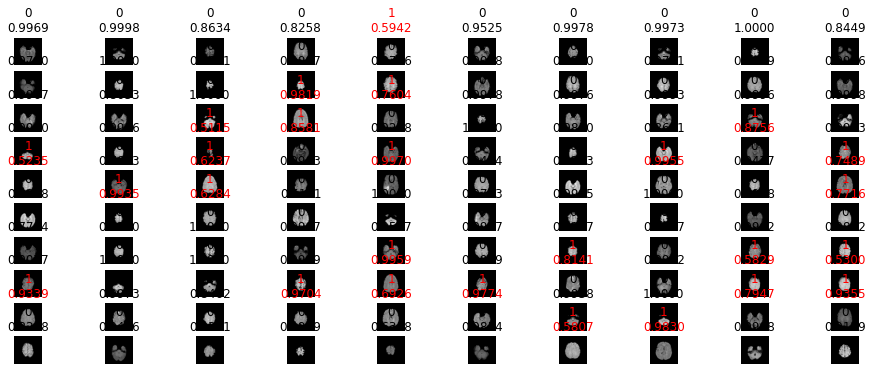

In [22]:
# testデータ30件の予測ラベル
pred_classes = model.predict_classes(x_test[0:100])

# testデータ30件の予測確率
pred_probs = model.predict(x_test[0:100]).max(axis = 1)
pred_probs = ['{:.4f}'.format(i) for i in pred_probs]

# testデータ30件の画像と予測ラベル＆予測確率を出力
plt.figure(figsize = (16, 6))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.axis("off")
    if pred_classes[i] == true_classes[i]:
        plt.title(labels[pred_classes[i]] + '\n' + pred_probs[i])
    else:
        plt.title(labels[pred_classes[i]] + '\n' + pred_probs[i], color = "red")
    plt.imshow(x_test[i])
plt.show()